# Stage 1 - EDA  & Feature Enginering

## Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

| Nama Fitur           | Tipe        | Rentang  | Keterangan                                                                 |
|-----------------------|-------------|----------|----------------------------------------------------------------------------|
| Age                  | Numerik     | 20-50    | Umur kandidat                                                              |
| Gender               | Kategorikal | 0/1      | 0 = Laki-laki, 1 = Perempuan                                               |
| EducationLevel       | Kategorikal | 1/2/3/4  | 1 = HighSchooll, 2 = S1 , 3 = S2, 4 = S3/PhD                       |
| ExperienceYears      | Numerik     | 0-15     | Lama pengalaman kerja (tahun)                                              |
| PreviousCompanies    | Numerik     | 1-5      | Jumlah perusahaan tempat bekerja sebelumnya                                |
| DistanceFromCompany  | Numerik     | 1-50     | Jarak dari rumah ke perusahaan                                             |
| InterviewScore       | Numerik     | 0-100    | Skor hasil wawancara                                                       |
| SkillScore           | Numerik     | 0-100    | Skor keterampilan teknis                                                   |
| PersonalityScore     | Numerik     | 0-100    | Skor aspek kepribadian                                                     |
| RecruitmentStrategy  | Kategorikal | 1/2/3    | 1 = Agresif, 2 = Moderat, 3 = Konservatif                                  |
| HiringDecision       | Target      | 0/1      | Target: 0 = tidak diterima, 1 = diterima                                   |


In [2]:
df = pd.read_csv('dataset/recruitment_data.csv')
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [4]:
df.shape

(1500, 11)

This dataset consists of 1,500 rows and 11 columns (10 feature columns and 1 target column), with 10 columns of integer type and 1 column of float type.

Several columns, namely Gender, Education Level, Recruitment Strategy, and Hiring Decision, are conceptually categorical rather than purely integer. Therefore, the next step is to convert the data type of these columns accordingly.

### Convert data type from integer to categorical

In [5]:
# Konversi ke kategori
df["Gender"] = df["Gender"].map({0: "Male", 1: "Female"}).astype("category")
df["EducationLevel"] = df["EducationLevel"].map({
    1: "1-highSchool",
    2: "2-Bachelor",
    3: "3-Master",
    4: "4-PhD"
}).astype("category")
df["RecruitmentStrategy"] = df["RecruitmentStrategy"].map({
    1: "1-Aggressive",
    2: "2-Moderate",
    3: "3-Conservative"
}).astype("category")
df["HiringDecision"] = df["HiringDecision"].map({0: "Not Hired", 1: "Hired"}).astype("category")



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1500 non-null   int64   
 1   Gender               1500 non-null   category
 2   EducationLevel       1500 non-null   category
 3   ExperienceYears      1500 non-null   int64   
 4   PreviousCompanies    1500 non-null   int64   
 5   DistanceFromCompany  1500 non-null   float64 
 6   InterviewScore       1500 non-null   int64   
 7   SkillScore           1500 non-null   int64   
 8   PersonalityScore     1500 non-null   int64   
 9   RecruitmentStrategy  1500 non-null   category
 10  HiringDecision       1500 non-null   category
dtypes: category(4), float64(1), int64(6)
memory usage: 88.6 KB


In [7]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,Female,2-Bachelor,0,3,26.783828,48,78,91,1-Aggressive,Hired
1,39,Female,4-PhD,12,3,25.862694,35,68,80,2-Moderate,Hired
2,48,Male,2-Bachelor,3,2,9.920805,20,67,13,2-Moderate,Not Hired
3,34,Female,2-Bachelor,5,2,6.407751,36,27,70,3-Conservative,Not Hired
4,30,Male,1-highSchool,6,1,43.105343,23,52,85,2-Moderate,Not Hired


In [8]:
print("Numerical Columns:")
display(df.describe().T)

Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.148667,9.252728,20.000000,27.000000,35.000000,43.000000,50.000000
ExperienceYears,1500.0,7.694000,4.641414,0.000000,4.000000,8.000000,12.000000,15.000000
PreviousCompanies,1500.0,3.002000,1.410670,1.000000,2.000000,3.000000,4.000000,5.000000
DistanceFromCompany,1500.0,25.505379,14.567151,1.031376,12.838851,25.502239,37.737996,50.992462
InterviewScore,1500.0,50.564000,28.626215,0.000000,25.000000,52.000000,75.000000,100.000000
SkillScore,1500.0,51.116000,29.353563,0.000000,25.750000,53.000000,76.000000,100.000000
PersonalityScore,1500.0,49.387333,29.353201,0.000000,23.000000,49.000000,76.000000,100.000000


In [9]:
cat_cols = df.select_dtypes(include=["category"]).columns
print("Categorical Columns:")
display(df[cat_cols].describe())

Categorical Columns:


,Gender,EducationLevel,RecruitmentStrategy,HiringDecision
count,1500,1500,1500,1500
unique,2,4,3,2
top,Male,2-Bachelor,2-Moderate,Not Hired
freq,762,740,770,1035


Missing Values and Duplicates

In [10]:
print(f"Missing values in each column: \n{df.isnull().sum()}")
print(f"\nduplicated rows: {df.duplicated().sum()}")

Missing values in each column: 
Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

duplicated rows: 0


There are no missing values or duplicate entries found in the dataset.

## Outliers

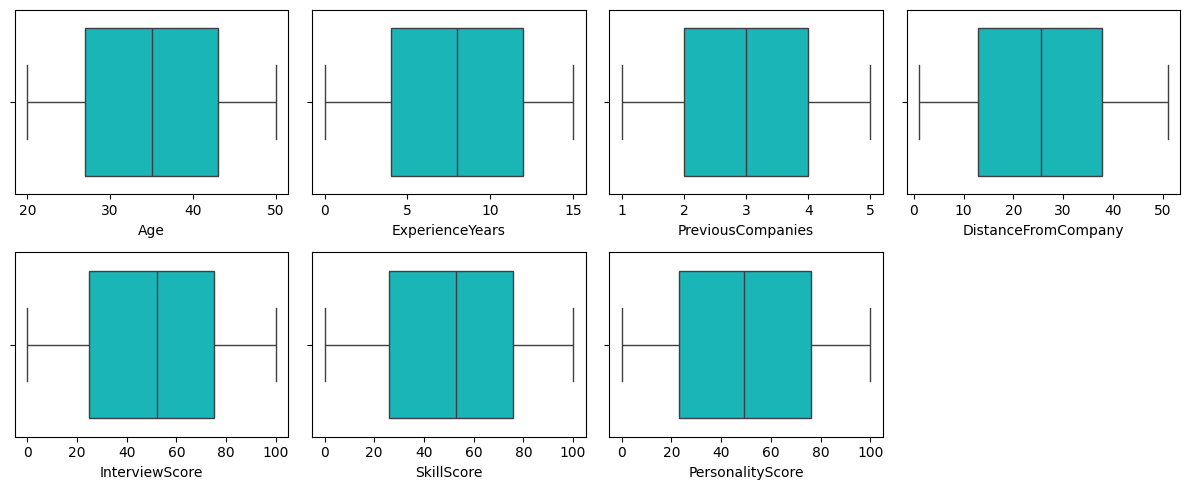

In [11]:
numeric= df.select_dtypes(include=['int64','float64']).columns
n_cols = 4
n_rows = (len(numeric) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(numeric):
    sns.boxplot(x=df[col], ax=axes[i],color="#00CED1")
    # axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}: {outliers.shape[0]} outliers")

Age: 0 outliers
ExperienceYears: 0 outliers
PreviousCompanies: 0 outliers
DistanceFromCompany: 0 outliers
InterviewScore: 0 outliers
SkillScore: 0 outliers
PersonalityScore: 0 outliers


No outliers were found in the numerical columns.

## Univariate Analysis 

### Numerical Column

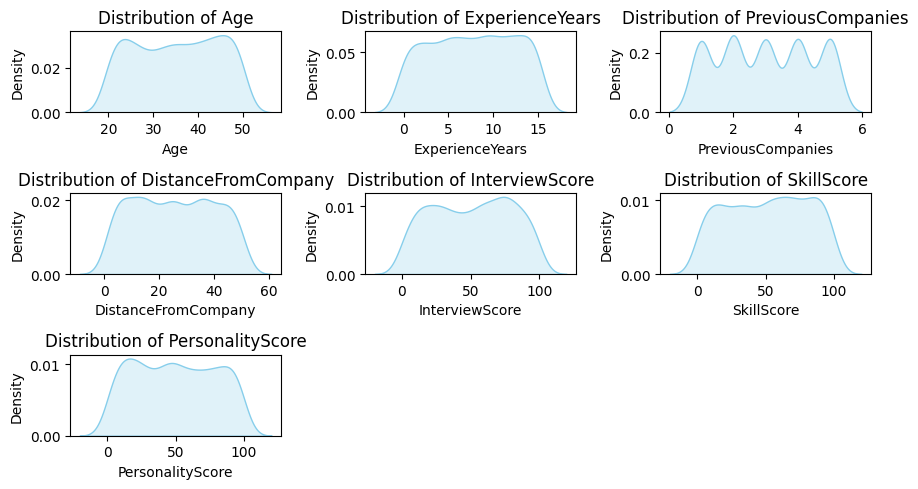

In [13]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

cols =3  # jumlah kolom subplot
rows = (len(numeric_cols) // cols) + (len(numeric_cols) % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(9,5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}")

# Matikan subplot kosong
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


<b>Kolom Numerik (Distribusi / KDE Plot)</B>

- Age : Distribusi relatif merata dari 20–50 tahun.Artinya kandidat tidak terlalu didominasi oleh kelompok usia tertentu.

- ExperienceYears : Rentang 0–15 tahun, distribusinya juga cukup merarata.Banyak kandidat dengan pengalaman rendah sampai tinggi.

- PreviousCompanies : Distribusi multimodal (ada beberapa puncak). Kandidat umumnya pernah bekerja di 1–5 perusahaan.

- DistanceFromCompany : sebarannya cenderung merata,Tidak ada dominasi kandidat yang sangat dekat atau sangat jauh.

- InterviewScore : Distribusinya cukup normal.Nilai paling banyak berada di tengah (sekitar 40–80).Bisa jadi mencerminkan evaluasi interviewer yang konsisten.

- SkillScore : Distribusinya mirip dengan InterviewScore.Sebaran dari rendah hingga tinggi relatif rata.Artinya variasi kemampuan teknis kandidat cukup beragam.

- PersonalityScore :Distribusinya juga mirip InterviewScore & SkillScore. Tidak ada dominasi di nilai ekstrem.Artinya aspek kepribadian kandidat cukup beragam.

C:\Users\666\AppData\Local\Temp\ipykernel_17276\1451759420.py:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=df[col], hue=df[col], ax=ax, palette=custom_colors, legend=False)
C:\Users\666\AppData\Local\Temp\ipykernel_17276\1451759420.py:14: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=df[col], hue=df[col], ax=ax, palette=custom_colors, legend=False)
C:\Users\666\AppData\Local\Temp\ipykernel_17276\1451759420.py:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=df[col], hue=df[col], ax=ax, palette=custom_colors, legend=False)


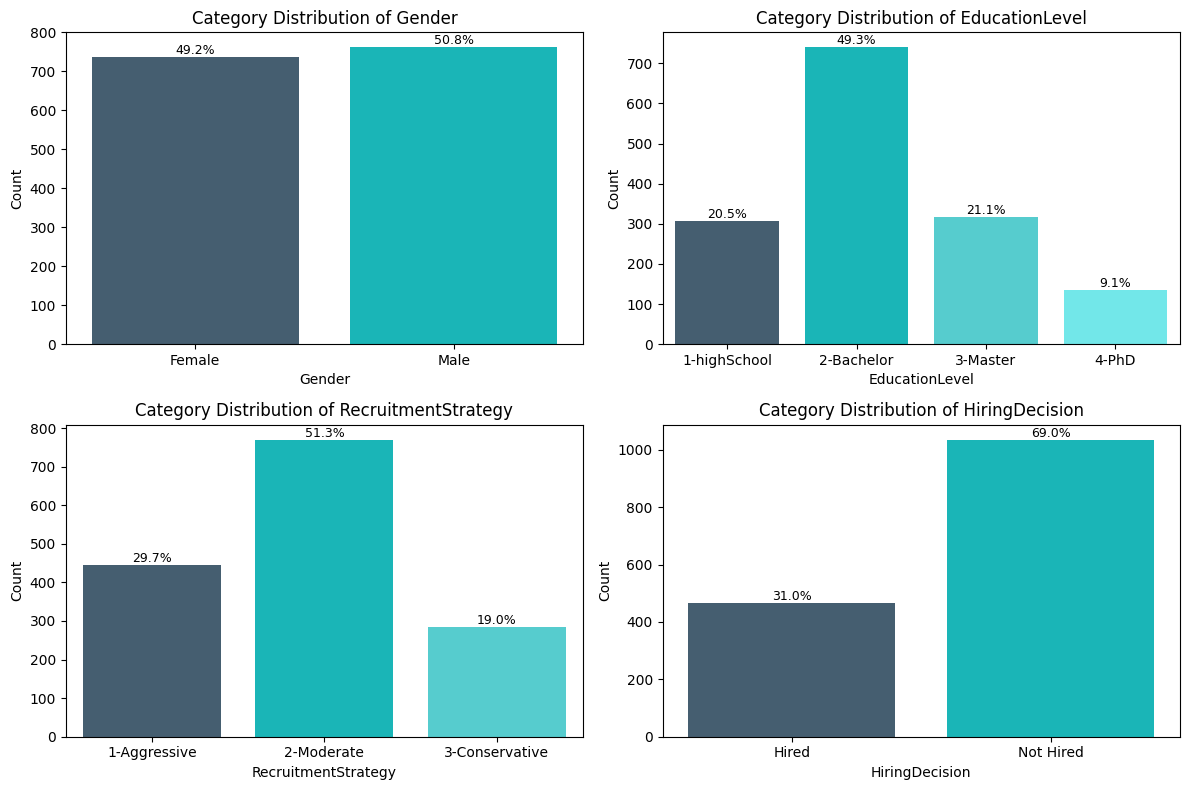

In [14]:
categorical_cols = df.select_dtypes(include=['category']).columns

cols = 2
rows = (len(categorical_cols) // cols) + (len(categorical_cols) % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows*4))
axes = axes.flatten()
custom_colors = ["#3E5F77", "#00CED1", "#42E0E2E1","#5EFAFD"]

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    counts = df[col].value_counts(normalize=True) * 100  # persentase

    sns.countplot(x=df[col], hue=df[col], ax=ax, palette=custom_colors, legend=False)
    ax.set_title(f"Category Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # Tambahkan persentase di atas bar
    for p in ax.patches:
        value = int(p.get_height())
        percentage = f"{100 * value / len(df):.1f}%"
        ax.text(
            p.get_x() + p.get_width() / 2,  # posisi tengah bar
            p.get_height(),                 # posisi atas bar
            percentage,
            ha='center', va='bottom', fontsize=9, color='black'
        )

# Matikan subplot kosong
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


<b>Kolom Kategorikal (Bar Plot)</b>

- Gender : Hampir seimbang: Male (50.8%) vs Female (49.2%) Tidak ada bias gender yang terlalu dominan.

- EducationLevel : Tertinggi: Bachelor (Type 2) (49.3%), Disusul Master (21.1%), Bachelor (Type 1) (20.5%), dan PhD (9.1%).
Artinya kandidat mayoritas berpendidikan S1, sedikit yang PhD.

- RecruitmentStrategy : Moderate (51.3%) paling banyak digunakan.Aggressive (29.7%) dan Conservative (19%). Bisa jadi strategi perekrutan lebih condong menggunakan metode moderat.

- HiringDecision (Target Variable) : Not Hired (69%) jauh lebih banyak daripada Hired (31%).Artinya data imbalanced (kelas tidak seimbang).



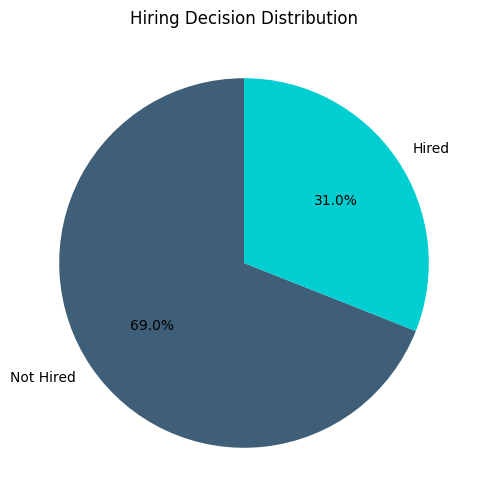

HiringDecision
Not Hired    1035
Hired         465
Name: count, dtype: int64

In [15]:
custom_colors = ["#3E5F77", "#00CED1"]
total_hd=df['HiringDecision'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    total_hd,
    labels=total_hd.index,
    autopct='%1.1f%%',   # tampilkan persentase
    startangle=90,       # mulai dari atas
    colors= custom_colors # warna custom
)
plt.title("Hiring Decision Distribution")
plt.show()

total_hd

Kumpulan data menunjukkan ketidakseimbangan kelas. yang 'diterima' sebesar 31% (1.035), sedangkan yang'tidak diterima' merupakan mayoritas dengan 69% (465). Penting untuk diperhatikan saat modeling agar tidak bias ke kelas mayoritas.

## Bivariate Analysis

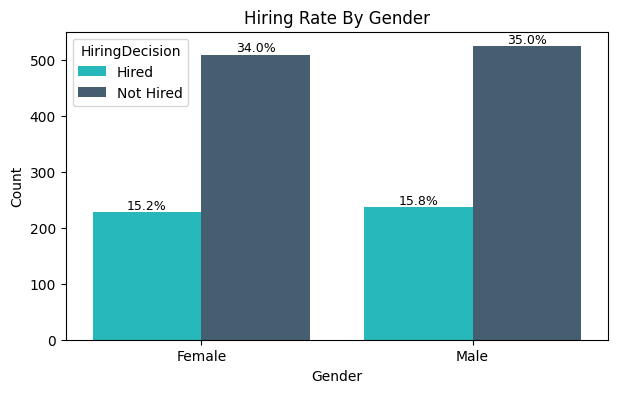

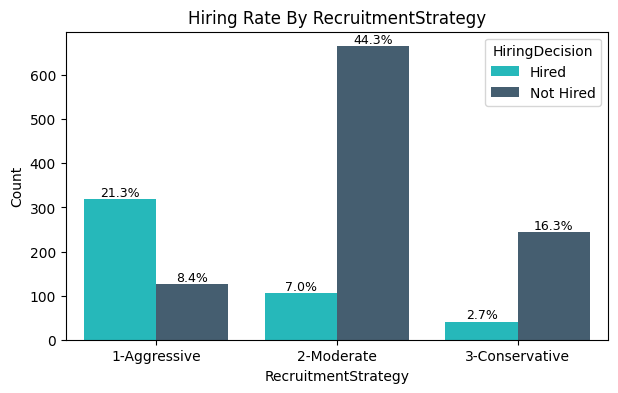

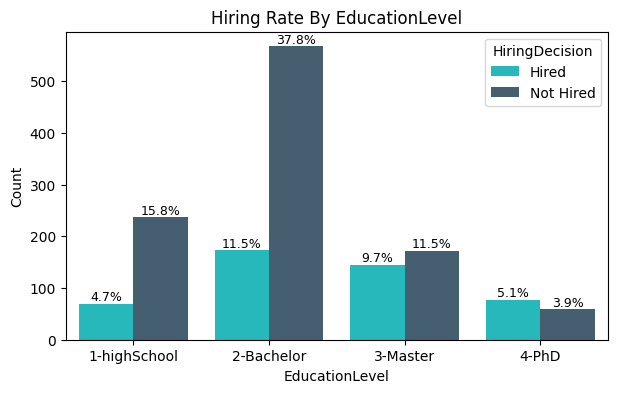

In [16]:
categorical_cols = ['Gender','RecruitmentStrategy', 'EducationLevel']
target = "HiringDecision"
custom_colors = ["#0DD0D3","#3E5F77"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    
    ax = sns.countplot(x=df[col], hue=df[target], palette=custom_colors)
    ax.set_title(f"Hiring Rate By {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # Tambahkan persentase di atas bar
    for p in ax.patches:
        value = int(p.get_height())
        if value == 0:   # lewati bar kosong
            continue
        percentage = f"{100 * value / len(df):.1f}%"
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            percentage,
            ha='center', va='bottom', fontsize=9, color='black'
    )

  
    plt.show()


### Barplot Hiring Rate
-  <b>Hiring Rate by Gender:</b><br>
Tidak ada perbedaan signifikan antara laki-laki dan perempuan dalam keputusan penerimaan. Hiring rate relatif sama (sekitar 15%). Artinya, gender bukan faktor dominan dalam keputusan rekrutmen di dataset ini.

- <b>Hiring Rate by Recruitment Strategy</b>
    - Aggressive :  peluang diterima lebih tinggi (21.3%), ini strategi paling efektif.
    - Moderate : lebih banyak kandidat yang tidak diterima (44.3%) daripada yang tidak diterima .
    - Conservative : strategi yang paling sedikit menerima kandidat (2.7%).<br>

     perusahaan lebih cenderung menerima kandidat lebih banyak dengan menggunakan strategi rekrutmen agresif.

- <b>Hiring Rate by Education Level</b>

    - Bachelor (Type 2) paling banyak melamar, tetapi tingkat tidak diterima juga tinggi (37.8%).
    - Bachelor (Type 1) lebih sediki yang melamar dibanding type 2 namun tinggkat peneramaannya paling sedikit 4.7%.
    - Master memiliki peluang diterima relatif lebih baik dibandingkan Type 1/2 (hired 9.7% vs not hired 11.5%).
    - PhD relatif sedikit yang melamar, namun peluang diterimanya lebih tinggi.

    Secara umum, pendidikan lebih tinggi (Master/PhD) meningkatkan kemungkinan diterima.

In [17]:
def categorize_experience(years):
    if years < 2:
        return 'Junior'
    elif 2 <= years < 5:
        return 'Mid'
    else:
        return 'Senior'
df['ExperienceLevel'] = df['ExperienceYears'].apply(categorize_experience).astype("category")
df.drop('ExperienceYears', axis=1, inplace=True)

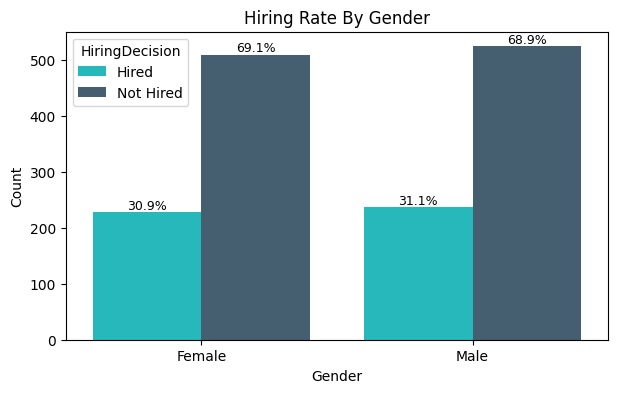

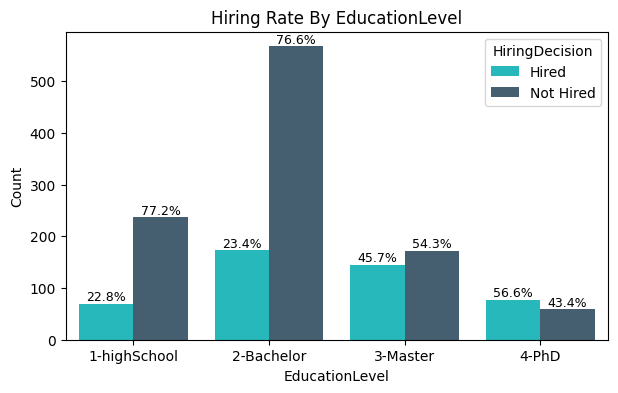

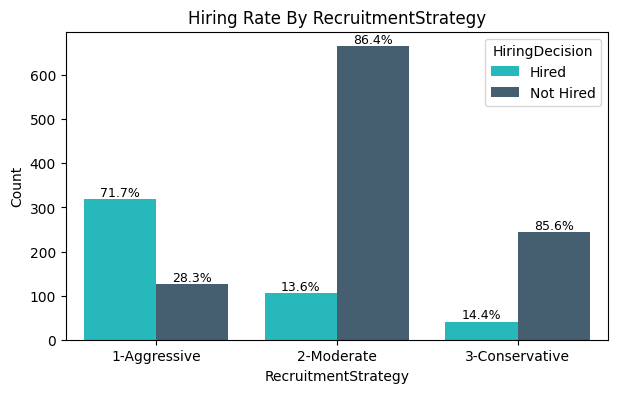

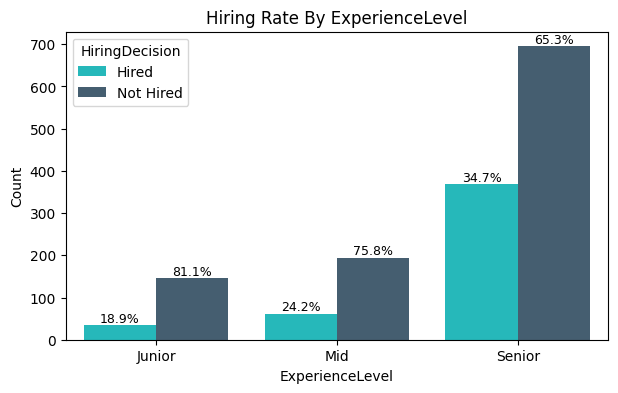

In [18]:
categorical_cols = df.select_dtypes(include=['category']).columns.drop('HiringDecision')
target = "HiringDecision"
custom_colors = ["#0DD0D3","#3E5F77"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    
    ax = sns.countplot(x=df[col], hue=df[target], palette=custom_colors)
    ax.set_title(f"Hiring Rate By {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # Hitung total per kategori (misal Female total = Hired + Not Hired)
    group_totals = df.groupby(col,observed=True)[target].count().to_dict()

    # Tambahkan persentase di atas bar
    for p in ax.patches:
        value = int(p.get_height())
        if value == 0:
            continue

        # ambil kategori x dari bar (misal Female / Male)
        category = p.get_x() + p.get_width() / 2
        category_label = p.get_x() + p.get_width() / 2

        # sebenarnya lebih aman ambil langsung label dari tick
        x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
        # index bar saat ini
        bar_index = round((p.get_x() + p.get_width()/2))
        # ambil kategori sesuai posisi
        category_label = x_tick_labels[bar_index] if bar_index < len(x_tick_labels) else None

        # kalau dapat kategori valid, hitung persentasenya
        if category_label in group_totals:
            percentage = f"{100 * value / group_totals[category_label]:.1f}%"
        else:
            percentage = ""

        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            percentage,
            ha='center', va='bottom', fontsize=9, color='black'
        )

    plt.show()


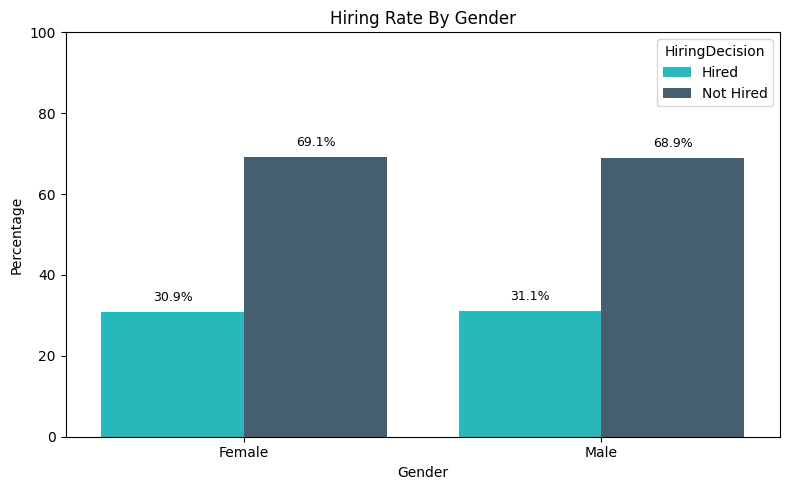

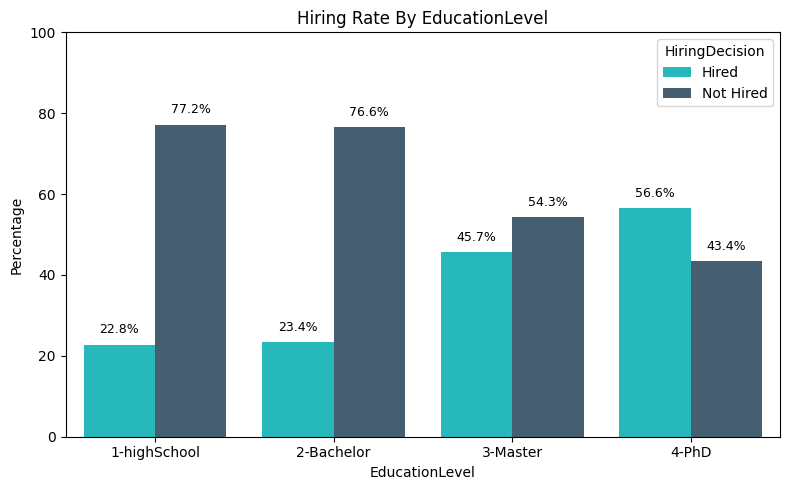

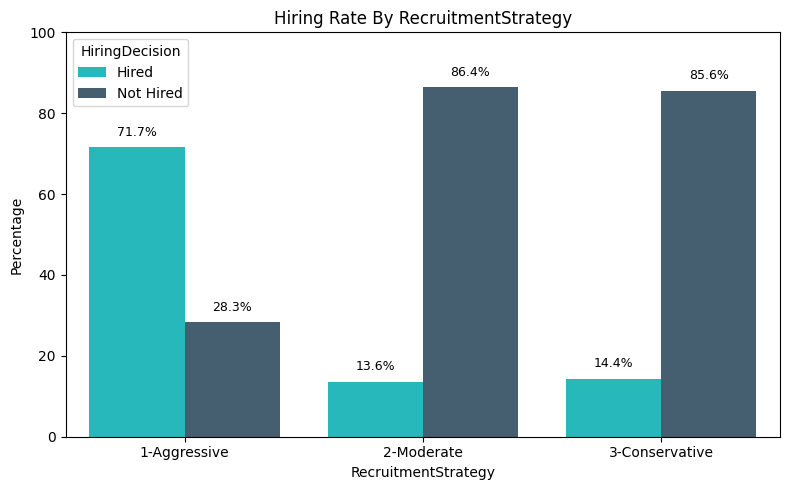

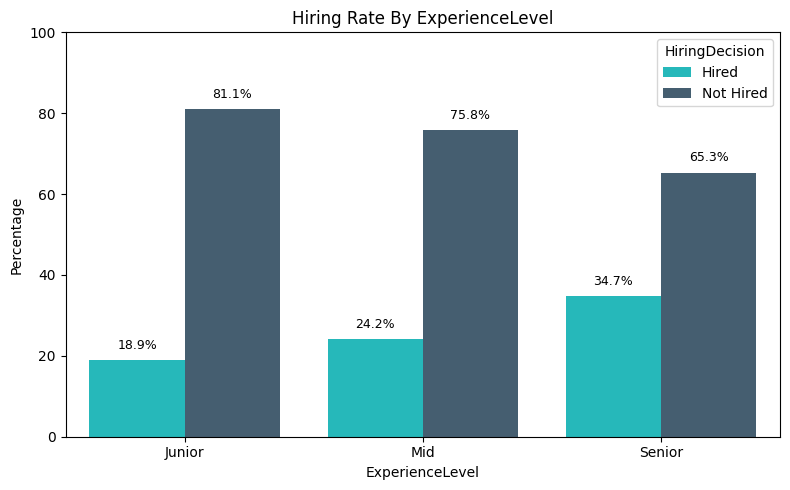

In [19]:
# categorical_cols = df.select_dtypes(include=['category']).columns.drop('HiringDecision')
# target = "HiringDecision"
custom_colors = ["#0DD0D3","#3E5F77"]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    
    proportions_df = df.groupby(col,observed=True)[target].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    
    ax = sns.barplot(data=proportions_df, x=col, y='Percentage', hue=target, palette=custom_colors)
    
    ax.set_title(f"Hiring Rate By {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Percentage")
    ax.set_ylim(0, 100)
    
    # Tambahkan label persentase di atas setiap bar
    for p in ax.patches:
        height = p.get_height()
        
        # Tambahkan kondisi ini: HANYA tampilkan label jika tingginya > 0
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2.,
                height + 2, # Tambahkan sedikit jarak agar label tidak menempel
                f"{height:.1f}%",
                ha='center', va='bottom', fontsize=9, color='black'
            )

    plt.tight_layout()
    plt.show()

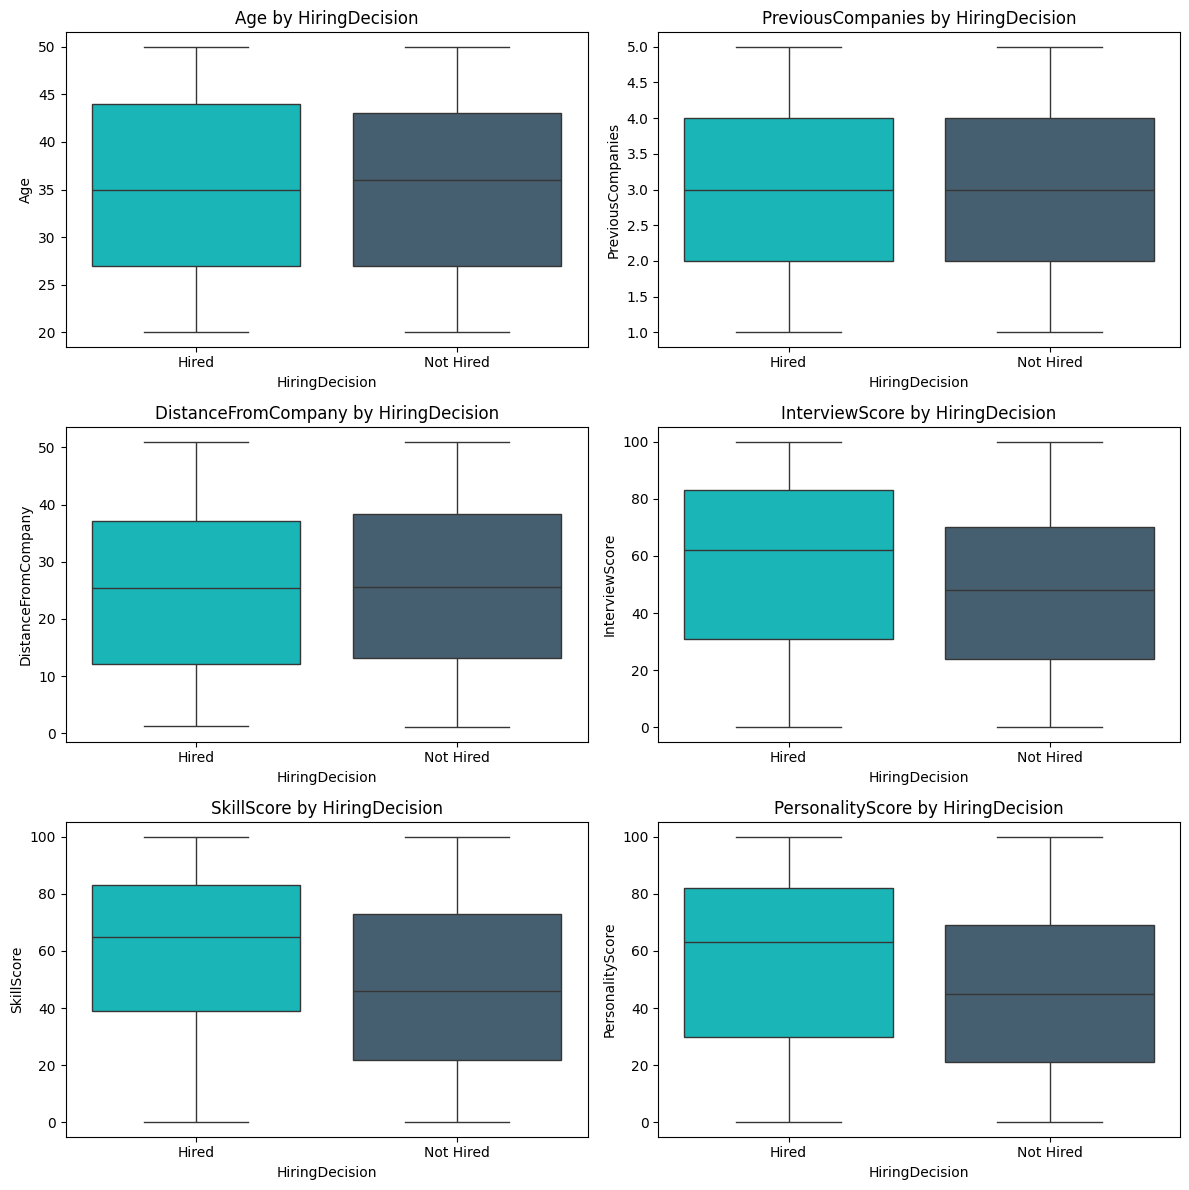

In [20]:
# daftar kolom numerikal
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
target = "HiringDecision"

cols = 2
rows = (len(numerical_cols) // cols) + (len(numerical_cols) % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows*4))
axes = axes.flatten()

custom_colors = ["#00CED1","#3E5F77"]

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x=target, y=col, data=df, palette=custom_colors, hue='HiringDecision', ax=ax)
    ax.set_title(f"{col} by {target}")

# sembunyikan axes kosong
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1500 non-null   int64   
 1   Gender               1500 non-null   category
 2   EducationLevel       1500 non-null   category
 3   PreviousCompanies    1500 non-null   int64   
 4   DistanceFromCompany  1500 non-null   float64 
 5   InterviewScore       1500 non-null   int64   
 6   SkillScore           1500 non-null   int64   
 7   PersonalityScore     1500 non-null   int64   
 8   RecruitmentStrategy  1500 non-null   category
 9   HiringDecision       1500 non-null   category
 10  ExperienceLevel      1500 non-null   category
dtypes: category(5), float64(1), int64(5)
memory usage: 78.5 KB


In [22]:
# # daftar kolom numerikal
# numerical_cols = df.select_dtypes(include=['int64','float64']).columns
# target = "HiringDecision"

# custom_colors = ["#00CED1","#3E5F77"]

# for col in numerical_cols:
#     plt.figure(figsize=(6,5))  # setiap kolom tampil di figure baru
#     sns.boxplot(
#         x=target, 
#         y=col, 
#         data=df, 
#         palette=custom_colors, 
#         hue='HiringDecision'
#     )
#     plt.title(f"{col} by {target}")
#     plt.tight_layout()
#     plt.show()


### Boxplot HiringDecision by Numerical column
- <b>Age:</b> <br>Usia kandidat tidak banyak memengaruhi keputusan untuk diterima.

- <b>ExperienceYears :</b> <br>Lama pengalaman kerja tidak menunjukkan perbedaan jelas antara diterima dan tidak.

- <b>PreviousCompanies:</b> <br>Jumlah perusahaan sebelumnya relatif sama pada kedua kelompok.

- <b>DistanceFromCompany:</b> <br>Jarak tempat tinggal kandidat ke perusahaan tidak berpengaruh signifikan terhadap keputusan.

- <b>InterviewScore:</b><br> Kandidat dengan skor interview lebih tinggi cenderung diterima.

- <b>SkillScore:</b> <br>Skor keterampilan yang tinggi berpeluang lebih besar untuk diterima.

- <b>PersonalityScore:</b><br>Skor kepribadian yang lebih baik meningkatkan kemungkinan kandidat diterima.

## Multivariate Analysis

### Pearson correlation

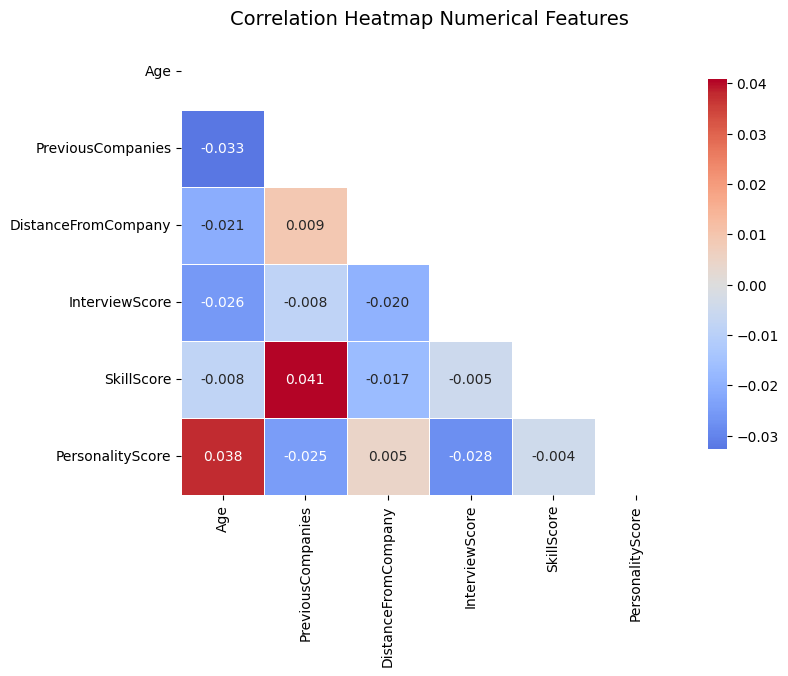

In [23]:
# Pastikan HiringDecision_num sudah dibuat dan bertipe integer

numerical_cols = df.select_dtypes(include=['int64','float64']).columns
# Hitung korelasi
corr = df[numerical_cols].corr()

# Buat mask untuk segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".3f",
            cmap="coolwarm", center=0, linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap Numerical Features", fontsize=14)
plt.show()


- <b>Korelsi antar fitur</b> <br>
korelasi cenderung lemah (-0,052 - 0,038) 

- <b>Korelasi dengan target</b>
    - ExperienceYears memiliki korelasi posisitf  terhadap target (0.122), semakin banyak pengalaman semakin tinggi kesempatan untuk diterima
    - InterviewScore memiliki korelasi positif terhadap target (0.146), semakin tinggi nilai interview semakin naik juga kesempatan untuk diterima.
    - PersonalityScore memiliki korelasi positif terhadap target (0.169), semakin tinggi nilai personality semakin tinggi juga kesempatan untuk diterima.
    -  SkillScore memiliki korelasi positif paling tinggi terhadap target (0.204), semakin tinggi nilai   SkillScore semakin tinggi juga kesempatan untuk diterima.
    
- Fitur lainya (age,PreviousCompanies,DistanceFromCompany ) cenderung memiliki korelasi yang rendah 

### Crosstab

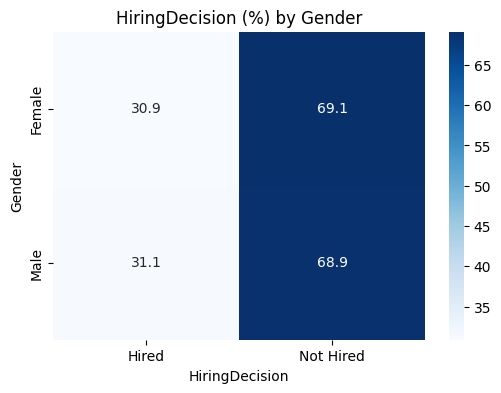

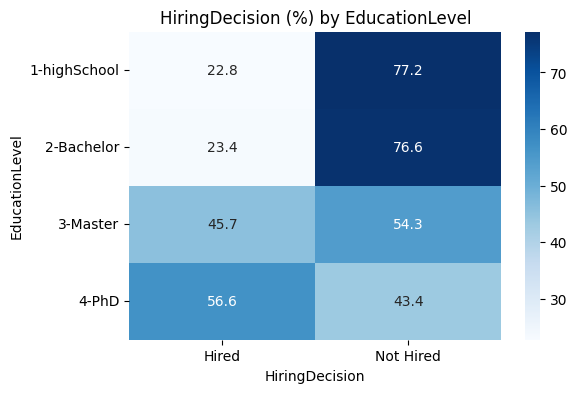

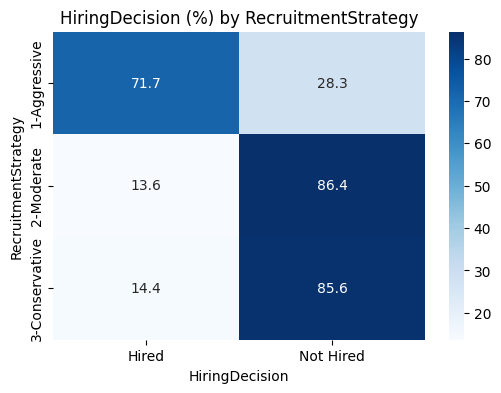

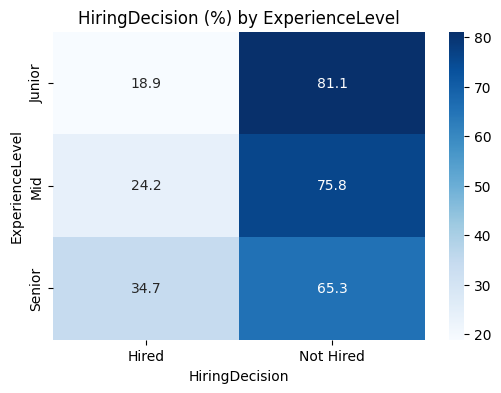

In [24]:
cat_cols = df.select_dtypes(include=['category']).columns.drop('HiringDecision')

for col in cat_cols:
    ct = pd.crosstab(df[col], df['HiringDecision'], normalize='index') * 100
    plt.figure(figsize=(6,4))
    sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
    plt.title(f"HiringDecision (%) by {col}")
    plt.ylabel(col)
    plt.xlabel("HiringDecision")
    plt.show()

- <b>HiringDecision (%) by Gender</b><br>
Tingkat penerimaan antara pria dan wanita perbedaannya hanya 0,2%.Artinya, gender tidak memiliki pengaruh signifikan terhadap peluang diterima atau tidak dan proses rekrutmen relatif netral terhadap gender.

- <b>HiringDecision (%) by EducationLevelr</b>
    - Kandidat dengan Bachelor (baik Type 1 maupun Type 2) punya peluang diterima sangat rendah (hanya sekitar 23%).
    - Master punya peluang lebih tinggi, hampir setengah dari kandidat diterima.
    - PhD memiliki peluang terbesar untuk diterima (lebih dari setengah).

    semakin tinggi tingkat pendidikan, semakin besar kemungkinan diterima. Variabel pendidikan cukup berpengaruh terhadap keputusan rekrutmen

- <b>HiringDecision (%) by RecruitmentStrategy</b>
    - Strategi agresif menghasilkan tingkat penerimaan tertinggi (lebih dari 70% kandidat diterima).
    - Sebaliknya, strategi konservatif dan moderat menghasilkan tingkat penerimaan yang sangat rendah (hanya sekitar 14%).
    
    Ini menunjukkan bahwa strategi rekrutmen yang dipilih perusahaan sangat berpengaruh terhadap peluang kandidat diterima. jika perusahaan ingin meningkatkan jumlah penerimaan, strategi agresif lebih efektif.

### Creamer's-v

In [25]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    if min_dim == 0:
        return 0.0
    return np.sqrt(chi2 / (n * min_dim))

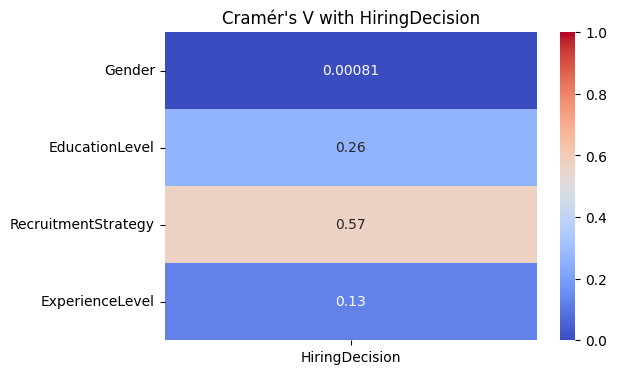

In [26]:
plt.figure(figsize=(6, 4))
cramer_v_target = pd.DataFrame(index=cat_cols, columns=['HiringDecision'])
for col in cat_cols:
    cramer_v_target.loc[col, 'HiringDecision'] = cramers_v(df[col], df['HiringDecision'])
cramer_v_target = cramer_v_target.astype(float)
sns.heatmap(cramer_v_target, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V with HiringDecision")
plt.show()

- <b>Gender - HiringDecision</b><br>
Nilai hampir nol,tidak ada hubungan antara gender dengan keputusan diterima/tidak.
- <b>EducationLevel - HiringDecision</b>
Ada hubungan yang cukup berarti, meskipun tidak terlalu kuat. Pendidikan memang memengaruhi keputusan, tetapi bukan satu-satunya faktor.
- <b>RecruitmentStrategy - HiringDecision</b>Recruitment strategy adalah faktor paling dominan yang memengaruhi keputusan rekrutmen.

## Chi-Square & ANOVA

In [27]:
# --- Chi-Square Test untuk kategori ---
chi2_results = []
categorical_cols = df.select_dtypes(include=['category']).columns.drop('HiringDecision')
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df["HiringDecision"])
    chi2, p, dof, _ = stats.chi2_contingency(contingency)
    chi2_results.append([col, chi2, p, dof])

chi2_df = pd.DataFrame(chi2_results, columns=["Feature", "Chi2", "p-value", "dof"])
chi2_df["Significance"] = chi2_df["p-value"].apply(lambda x: "Significant" if x < 0.05 else "Not Significant")

# Format angka biar lebih mudah dibaca
chi2_df = chi2_df.round({"Chi2": 3, "p-value": 4})


# --- ANOVA Test untuk numerik ---
anova_results = []
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    groups = [group[col].values for _, group in df.groupby("HiringDecision", observed=True)]
    f_stat, p = stats.f_oneway(*groups)
    anova_results.append([col, f_stat, p])

anova_df = pd.DataFrame(anova_results, columns=["Feature", "F-stat", "p-value"])
anova_df["Significance"] = anova_df["p-value"].apply(lambda x: "Significant" if x < 0.05 else "Not Significant")

anova_df = anova_df.round({"F-stat": 3, "p-value": 4})


print("=== Hasil Chi-Square Test (Kategorikal) ===")
display(chi2_df)

print("\n=== Hasil ANOVA Test (Numerikal) ===")
display(anova_df)


=== Hasil Chi-Square Test (Kategorikal) ===


,Feature,Chi2,p-value,dof,Significance
0,Gender,0.001,0.9751,1,Not Significant
1,EducationLevel,103.675,0.0000,3,Significant
2,RecruitmentStrategy,489.681,0.0000,2,Significant
3,ExperienceLevel,24.585,0.0000,2,Significant



=== Hasil ANOVA Test (Numerikal) ===


,Feature,F-stat,p-value,Significance
0,Age,0.005,0.9429,Not Significant
1,PreviousCompanies,2.909,0.0883,Not Significant
2,DistanceFromCompany,0.422,0.5158,Not Significant
3,InterviewScore,32.656,0.0000,Significant
4,SkillScore,64.827,0.0000,Significant
5,PersonalityScore,44.137,0.0000,Significant


-  <b>Chi-Square Test (Kategorikal vs HiringDecision)</b>
    - Gender<br>p-value = 0.9751 > 0.05 , gender tidak berhubungan dengan diterima atau tidaknya kandidat.
    - EducationLevel<br>p-value = 0.0000 (< 0.05), Pendidikan memengaruhi keputusan rekrutmen.
    - RecruitmentStrategy<br> p-value = 0.0000 (< 0.05),Strategi rekrutmen sangat berpengaruh terhadap keputusan,Ini faktor paling kuat di antara variabel kategorikal.

- <b>ANOVA Test (Numerikal vs HiringDecision)</br>
    - Age <br> p-value = 0.9429 > 0.05 ,Usia tidak berpengaruh terhadap diterima/tidaknya kandidat.
    - ExperienceYears<br>p-value = 0.0000 < 0.05, Semakin banyak pengalaman kerja, semakin tinggi peluang diterima.
    - PreviousCompanies<br> p-value = 0.0883 > 0.05, Jumlah perusahaan sebelumnya tidak berpengaruh signifikan.
    - DistanceFromCompany</b>p-value = 0.5158 > 0.05,Jarak tempat tinggal dari perusahaan tidak berhubungan dengan keputusan.
    - InterviewScore<br>p-value = 0.0000 < 0.05,Skor wawancara sangat memengaruhi peluang diterima.
    - SkillScore<br> p-value = 0.0000 (< 0.05),Skor keterampilan teknis berpengaruh besar terhadap keputusan rekrutmen.
    - PersonalityScore<br> p-value = 0.0000 (< 0.05),Penilaian kepribadian juga berhubungan kuat dengan diterima/tidaknya kandidat.

- <b>Kesimpulan:</b></br>
 proses rekrutmen lebih ditentukan oleh kualitas kandidat (skill, interview, personality, pengalaman) dan strategi rekrutmen perusahaan, bukan faktor demografi (gender, usia, jarak).

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1500 non-null   int64   
 1   Gender               1500 non-null   category
 2   EducationLevel       1500 non-null   category
 3   PreviousCompanies    1500 non-null   int64   
 4   DistanceFromCompany  1500 non-null   float64 
 5   InterviewScore       1500 non-null   int64   
 6   SkillScore           1500 non-null   int64   
 7   PersonalityScore     1500 non-null   int64   
 8   RecruitmentStrategy  1500 non-null   category
 9   HiringDecision       1500 non-null   category
 10  ExperienceLevel      1500 non-null   category
dtypes: category(5), float64(1), int64(5)
memory usage: 78.5 KB


## WOE IV (Infomation Value)

In [29]:
df["HiringDecision"] = df["HiringDecision"].map({"Not Hired" : 0, "Hired" :1 }).astype("int64")

In [30]:
# --- Import library ---
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

# --- Load dataset ---
TARGET = "HiringDecision"

# --- WOE/IV helpers ---
def _prep_good_bad(series_target):
    if not set(series_target.dropna().unique()).issubset({0, 1}):
        raise ValueError("Target must be binary 0/1.")

def calc_woe_table(df_in, feature, target, eps=1e-6):
    _prep_good_bad(df_in[target])
    tmp = df_in[[feature, target]].dropna()
    # tambahkan observed=False untuk menghindari FutureWarning
    g = tmp.groupby(feature, observed=False)[target].agg(['sum','count'])
    g.rename(columns={'sum':'good'}, inplace=True)
    g['bad'] = g['count'] - g['good']
    total_good = g['good'].sum()
    total_bad  = g['bad'].sum()
    g['dist_good'] = g['good'] / (total_good + eps)
    g['dist_bad']  = g['bad']  / (total_bad + eps)
    g['woe'] = np.log((g['dist_good'] + eps) / (g['dist_bad'] + eps))
    return g[['good','bad','dist_good','dist_bad','woe']]

def calc_iv_from_table(woe_table):
    return float(((woe_table['dist_good'] - woe_table['dist_bad']) * woe_table['woe']).sum())

def is_probably_categorical(df_in, col, max_unique=10, max_ratio=0.05):
    n = df_in[col].nunique(dropna=True)
    ratio = n / max(len(df_in), 1)
    return (n <= max_unique) or (ratio <= max_ratio)

def bin_numeric_series(s, q=5):
    vals = s.dropna().unique()
    if vals.size < 2:
        return None
    bins = int(min(max(q, 2), vals.size))
    try:
        return pd.qcut(s, q=bins, duplicates="drop")
    except Exception:
        try:
            return pd.cut(s, bins=bins, duplicates="drop")
        except Exception:
            return None

def calc_iv_feature(df_in, feature, target, q_bins=5):
    if feature == target:
        return None
    col = df_in[feature]
    if is_numeric_dtype(col) and not is_probably_categorical(df_in, feature):
        binned = bin_numeric_series(col, q=q_bins)
        if binned is None or binned.nunique(dropna=True) < 2:
            return 0.0
        tmp = df_in.copy()
        tmp["_bin"] = binned
        # groupby on _bin — gunakan observed=False juga untuk konsistensi
        woe_tbl = calc_woe_table(tmp, "_bin", target)
    else:
        woe_tbl = calc_woe_table(df_in, feature, target)
    return calc_iv_from_table(woe_tbl)
# --- Fungsi interpretasi IV ---
# --- Function to interpret IV in English ---
def interpret_iv(iv):
    if iv < 0.02:
        return "Useless (no predictive power)"
    elif iv < 0.1:
        return "Weak"
    elif iv < 0.3:
        return "Medium"
    elif iv < 0.5:
        return "Strong"
    else:
        return "Suspiciously strong (possible overfit)"


# Tambahkan kolom interpretasi


# --- Hitung IV semua fitur ---
iv_rows = []
for col in df.columns:
    if col == TARGET:
        continue
    iv_val = calc_iv_feature(df, col, TARGET, q_bins=5)
    if iv_val is None:
        continue
    iv_rows.append({"Features": col, "IV": iv_val})

iv_df = pd.DataFrame(iv_rows).sort_values("IV", ascending=False).reset_index(drop=True)
iv_df["Interpretation"] = iv_df["IV"].apply(interpret_iv)

# Tampilkan hasil
iv_df


,Features,IV,Interpretation
0,RecruitmentStrategy,1.556545,Suspiciously strong (possible overfit)
1,EducationLevel,0.308379,Strong
2,SkillScore,0.216449,Medium
3,InterviewScore,0.202772,Medium
4,PersonalityScore,0.194108,Medium
5,Age,0.094114,Weak
6,ExperienceLevel,0.083459,Weak
7,PreviousCompanies,0.016228,Useless (no predictive power)
8,DistanceFromCompany,0.006117,Useless (no predictive power)
9,Gender,0.000024,Useless (no predictive power)


T-test

In [31]:
ttest_results = []
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.drop('HiringDecision')

for col in numerical_cols:
    # Pisahkan dua grup berdasarkan HiringDecision
    group0 = df[df["HiringDecision"] == 0][col].dropna()
    group1 = df[df["HiringDecision"] == 1][col].dropna()
    
    # Independent two-sample t-test (equal_var=False lebih fleksibel, Welch's t-test)
    t_stat, p = stats.ttest_ind(group1, group0, equal_var=True)
    
    ttest_results.append([col, t_stat, p])

# Simpan ke DataFrame
ttest_df = pd.DataFrame(ttest_results, columns=["Feature", "t-stat", "p-value"])
ttest_df["Significance"] = ttest_df["p-value"].apply(
    lambda x: "Significant (p <= 0.05)" if x < 0.05 else "Not Significant (p >= 0.05)"
)

# Pembulatan
ttest_df = ttest_df.round({"t-stat": 4, "p-value": 4})
ttest_df.to_excel("ttest.xlsx", index=False, sheet_name="ttest")
ttest_df

,Feature,t-stat,p-value,Significance
0,Age,0.0716,0.9429,Not Significant (p >= 0.05)
1,PreviousCompanies,1.7056,0.0883,Not Significant (p >= 0.05)
2,DistanceFromCompany,-0.6500,0.5158,Not Significant (p >= 0.05)
3,InterviewScore,5.7146,0.0000,Significant (p <= 0.05)
4,SkillScore,8.0515,0.0000,Significant (p <= 0.05)
5,PersonalityScore,6.6436,0.0000,Significant (p <= 0.05)


###  Key Insights:
- **Most predictive:** RecruitmentStrategy (dominant), EducationLevel (strong).  
- **Moderately useful:** SkillScore, InterviewScore, PersonalityScore.  
- **Weak predictors:** Age, ExperienceLevel.  
- **Not useful:** PreviousCompanies, DistanceFromCompany, Gender.  

## Kesimpulan EDA

### 1. Karakteristik Data
- Dataset berisi **1.500 kandidat** dengan **10 fitur prediktor** dan **1 target (HiringDecision)**.  
- Tidak ada **missing values**, duplikasi, maupun outlier yang signifikan.  
- Distribusi gender hampir seimbang (**Male 50.8%** vs **Female 49.2%**).  
- Mayoritas kandidat berpendidikan **S1 (Type 1 & Type 2)**, sedangkan **PhD relatif sedikit**.  
- Strategi rekrutmen yang paling sering digunakan adalah **Moderate (51.3%)**, disusul **Aggressive (29.7%)** dan **Conservative (19%)**.  
- Target **imbalanced**: *Not Hired (69%)* jauh lebih dominan dibanding *Hired (31%)*.  


### 2. Faktor Demografi (Age, Gender, Distance, PreviousCompanies)
- **Gender, Usia, Jarak rumah, dan Jumlah perusahaan sebelumnya** tidak berpengaruh signifikan terhadap keputusan rekrutmen.  
- Dibuktikan oleh hasil **Chi-Square & ANOVA (p-value > 0.05)** serta korelasi yang lemah dengan target.  
- Kesimpulan: **demografi kandidat relatif netral** dalam keputusan penerimaan.  


### 3. Faktor Pendidikan
- Tingkat pendidikan berhubungan dengan peluang diterima (**Chi-Square signifikan, Cramér’s V = 0.263**).  
- **Bachelor (Type 1 & 2)**, peluang diterima rendah (~23%).  
- **Master** ,lebih berpeluang (45.7% diterima).  
- **PhD**, peluang paling tinggi (56.6% diterima).  
- Kesimpulan: **semakin tinggi pendidikan, semakin besar peluang diterima**, meskipun bukan faktor tunggal.  

### 4. Strategi Rekrutmen
- Faktor **paling dominan** dalam keputusan penerimaan (**Chi-Square signifikan, Cramér’s V = 0.571**).  
- **Aggressive strategy** , tingkat penerimaan tertinggi (>70%).  
- **Moderate & Conservative strategy** → jauh lebih rendah (~14%).  
- Kesimpulan: **cara perusahaan melakukan rekrutmen sangat menentukan outcome**.  

### 5. Faktor Kualitas Kandidat
Dari uji **ANOVA dan korelasi**, faktor numerikal yang paling signifikan adalah:  
- **SkillScore** (p < 0.05, korelasi tertinggi 0.204),kemampuan teknis berperan penting.  
- **InterviewScore** (p < 0.05) , performa wawancara sangat memengaruhi peluang diterima.  
- **PersonalityScore** (p < 0.05), kepribadian juga penting.  
- **ExperienceYears** (p < 0.05),pengalaman kerja menambah peluang diterima.  

📌 **Kesimpulan:** Dimensi *keterampilan, wawancara, kepribadian, dan pengalaman* adalah **penentu utama seleksi kandidat**, bukan faktor demografi.  


## Convertdata

In [32]:
df_for_model = pd.read_csv('dataset/recruitment_data.csv')
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


# Split data 

In [33]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


C:\Users\666\AppData\Local\Temp\ipykernel_17276\1167865685.py:49: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\666\miniconda3\envs\env_finpro3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


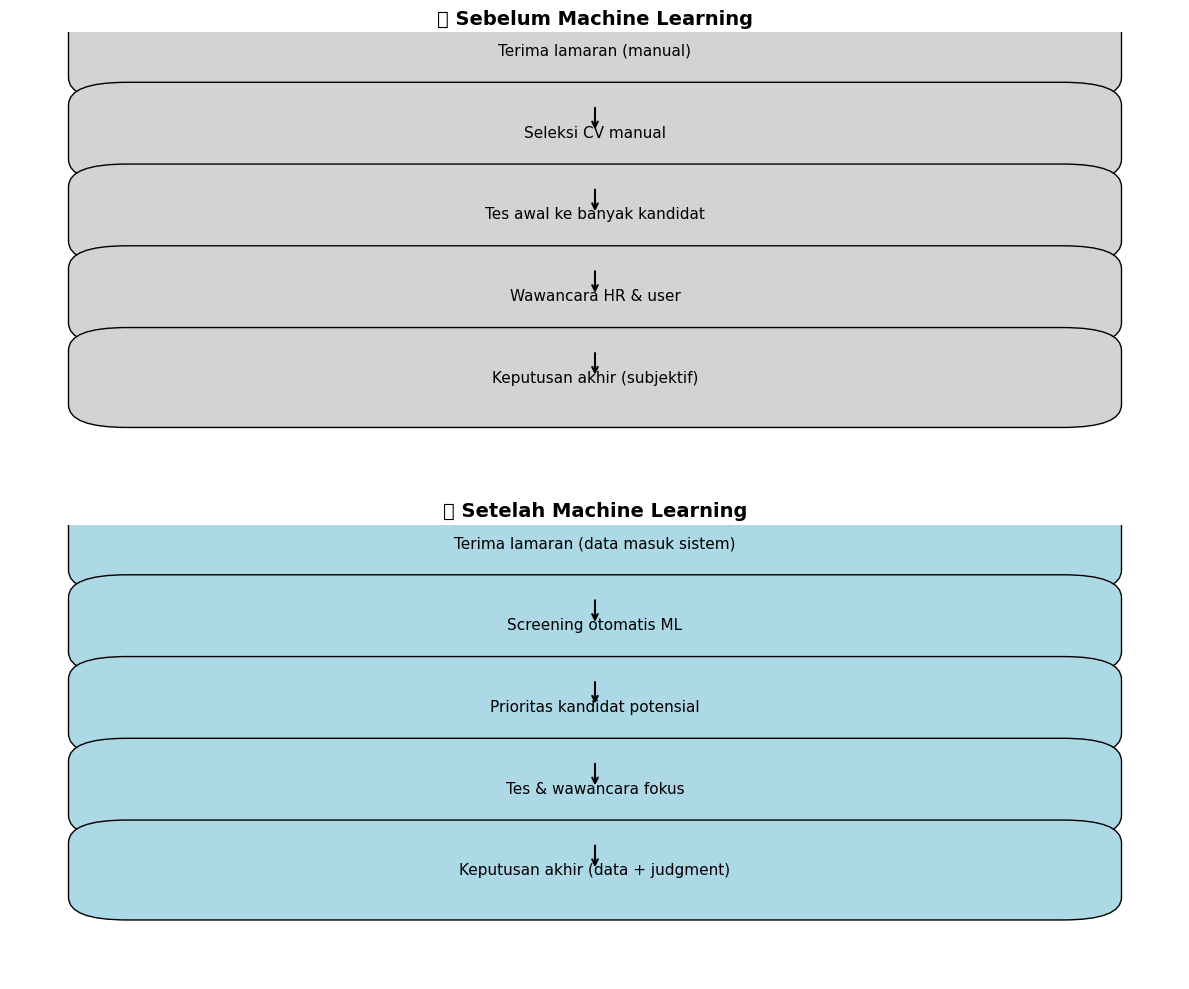

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

# Create figure
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# --- Flow Sebelum ML ---
axes[0].set_title("🔹 Sebelum Machine Learning", fontsize=14, weight="bold")
axes[0].axis("off")

before_steps = [
    "Terima lamaran (manual)",
    "Seleksi CV manual",
    "Tes awal ke banyak kandidat",
    "Wawancara HR & user",
    "Keputusan akhir (subjektif)"
]

for i, step in enumerate(before_steps):
    axes[0].add_patch(mpatches.FancyBboxPatch((0.1, 0.9 - i*0.18), 0.8, 0.12,
                                              boxstyle="round,pad=0.05", 
                                              edgecolor="black", facecolor="lightgrey"))
    axes[0].text(0.5, 0.96 - i*0.18, step, ha="center", va="center", fontsize=11)
    if i < len(before_steps)-1:
        axes[0].annotate("", xy=(0.5, 0.9 - (i+1)*0.18 + 0.06), xytext=(0.5, 0.9 - i*0.18 - 0.06),
                         arrowprops=dict(arrowstyle="->", lw=1.5))

# --- Flow Setelah ML ---
axes[1].set_title("🔹 Setelah Machine Learning", fontsize=14, weight="bold")
axes[1].axis("off")

after_steps = [
    "Terima lamaran (data masuk sistem)",
    "Screening otomatis ML",
    "Prioritas kandidat potensial",
    "Tes & wawancara fokus",
    "Keputusan akhir (data + judgment)"
]

for i, step in enumerate(after_steps):
    axes[1].add_patch(mpatches.FancyBboxPatch((0.1, 0.9 - i*0.18), 0.8, 0.12,
                                              boxstyle="round,pad=0.05", 
                                              edgecolor="black", facecolor="lightblue"))
    axes[1].text(0.5, 0.96 - i*0.18, step, ha="center", va="center", fontsize=11)
    if i < len(after_steps)-1:
        axes[1].annotate("", xy=(0.5, 0.9 - (i+1)*0.18 + 0.06), xytext=(0.5, 0.9 - i*0.18 - 0.06),
                         arrowprops=dict(arrowstyle="->", lw=1.5))

plt.tight_layout()
plt.show()


In [35]:
X = df.drop("HiringDecision", axis=1)  
y = df["HiringDecision"]

# split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)

# gabungkan kembali X dan y agar sesuai dengan data awal
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# simpan ke CSV
train_set.to_csv("dataset/train.csv", index=False)
test_set.to_csv("dataset/test.csv", index=False)

print("Dataset berhasil disimpan ke 'train.csv' dan 'test.csv'")

Ukuran X_train: (1200, 10)
Ukuran X_test : (300, 10)
Ukuran y_train: (1200,)
Ukuran y_test : (300,)
Dataset berhasil disimpan ke 'train.csv' dan 'test.csv'


In [36]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [37]:
train_df.head()

,Age,Gender,EducationLevel,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,ExperienceLevel,HiringDecision
0,34,Male,3-Master,2,10.376361,46,88,77,1-Aggressive,Senior,1
1,42,Female,3-Master,2,44.264728,98,75,98,2-Moderate,Mid,1
2,43,Male,1-highSchool,2,28.249114,57,16,44,2-Moderate,Senior,0
3,48,Female,2-Bachelor,3,4.446394,35,35,97,3-Conservative,Junior,0
4,24,Female,2-Bachelor,5,45.141158,20,25,4,1-Aggressive,Mid,0


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1200 non-null   int64  
 1   Gender               1200 non-null   object 
 2   EducationLevel       1200 non-null   object 
 3   PreviousCompanies    1200 non-null   int64  
 4   DistanceFromCompany  1200 non-null   float64
 5   InterviewScore       1200 non-null   int64  
 6   SkillScore           1200 non-null   int64  
 7   PersonalityScore     1200 non-null   int64  
 8   RecruitmentStrategy  1200 non-null   object 
 9   ExperienceLevel      1200 non-null   object 
 10  HiringDecision       1200 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 103.3+ KB


In [ ]:
cat_cols = train_df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
display(train_df[cat_cols].describe())

Categorical Columns:


,Gender,EducationLevel,RecruitmentStrategy,ExperienceLevel
count,1200,1200,1200,1200
unique,2,4,3,3
top,Male,2-Bachelor,2-Moderate,Senior
freq,618,601,620,854


In [42]:
cat_cols = test_df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
display(test_df[cat_cols].describe())

Categorical Columns:


,Gender,EducationLevel,RecruitmentStrategy,ExperienceLevel
count,300,300,300,300
unique,2,4,3,3
top,Female,2-Bachelor,2-Moderate,Senior
freq,156,139,150,210
